In [1]:
# ========================================
# IMPORT LIBRARIES
# ========================================
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import VarianceThreshold

In [2]:
# ========================================
# IMPORT DATAFRAME
# ========================================
df = pd.read_csv('data/df01.csv', sep=',', na_filter=False, index_col=0, parse_dates=['launched_at'])

In [3]:
df.isnull().sum().sum()

0

In [4]:
df.isna().sum().sum()

0

In [5]:
(df == '').sum().sum()

0

In [6]:
df.head(2)

,launch_state,id,launched_at,category,country,goal,backers_count,pledged_ratio,funding_days,staff_pick,...,IT,JP,LU,MX,NL,NO,NZ,SE,SG,US
0,0,895922629,2014-10-28 19:42:54,technology,US,3500.0,1,0.014286,30,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1190376005,2011-10-17 18:39:11,games,US,225.0,63,7.170978,16,1,...,0,0,0,0,0,0,0,0,0,1


In [7]:
df.columns[0:12]

Index(['launch_state', 'id', 'launched_at', 'category', 'country', 'goal',
       'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       'spotlight', 'comics'],
      dtype='object')

In [8]:
df.shape

(141447, 46)

In [9]:
# ========================================
# VARIABLE REDUCTION
# ========================================
info_variables = ['id','launched_at','category','country'] # informational variables

In [10]:
# ---- ZERO-VARIANCE ----
sel = VarianceThreshold(threshold=0.0)

In [11]:
sel.fit_transform(X=df.drop(columns=info_variables)).shape[1] - df.drop(columns=info_variables).shape[1]

0

In [81]:
# there are no zero-variance variables

*\# NEAR-ZERO VARIANCE*

There is much discussion about whether such variables should be removed - there are times where even very low variance variables have a large effect in predicting the outcome. We will keep these.

In [12]:
# ---- VARIABLE-OUTCOME CORRELATIONS ----
corr_threshold = 0.5

In [13]:
df.drop(columns=info_variables).corr().drop(columns='launch_state').iloc[0]

goal            -0.034705
backers_count    0.114009
pledged_ratio    0.016432
funding_days    -0.092032
staff_pick       0.250847
spotlight        1.000000
comics           0.103385
crafts          -0.044790
dance            0.064375
design           0.026660
fashion          0.016618
film & video     0.009035
food            -0.129185
games            0.020691
journalism      -0.093706
music            0.075755
photography     -0.026154
publishing       0.085618
technology      -0.145274
theater          0.066612
AU              -0.047206
BE              -0.018832
CA              -0.042394
CH              -0.013244
DE              -0.037125
DK              -0.013898
ES              -0.033080
FR              -0.018323
GB              -0.021792
HK               0.006171
IE              -0.015362
IT              -0.054612
JP              -0.000635
LU               0.001703
MX              -0.026270
NL              -0.043146
NO              -0.015242
NZ              -0.016988
SE          

In [14]:
df_corr_variable_outcome = pd.DataFrame(abs(df.drop(columns=info_variables).corr().drop(columns='launch_state').iloc[0])).reset_index()

In [15]:
df_corr_variable_outcome.columns = ['variable','corr_launch_state']

In [16]:
df_corr_variable_outcome.head()

,variable,corr_launch_state
0,goal,0.034705
1,backers_count,0.114009
2,pledged_ratio,0.016432
3,funding_days,0.092032
4,staff_pick,0.250847


In [17]:
df_corr_variable_outcome.sort_values(by='corr_launch_state', ascending=False).head()

,variable,corr_launch_state
5,spotlight,1.000000
4,staff_pick,0.250847
18,technology,0.145274
12,food,0.129185
1,backers_count,0.114009


In [27]:
# Looks like we do have some high correlation.

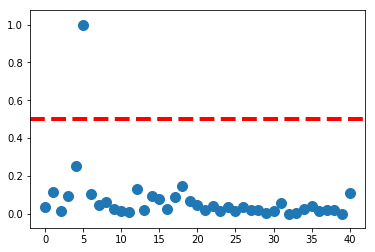

In [18]:
plt.scatter(x=df_corr_variable_outcome.index,y=df_corr_variable_outcome['corr_launch_state'], s=100)
plt.axhline(y=0.5, color='r', linestyle='--', linewidth=4)

In [19]:
df_corr_variable_outcome[df_corr_variable_outcome['corr_launch_state'] > 0.5]['variable']

5    spotlight
Name: variable, dtype: object

In [20]:
# The only variable of interest here is spotlight. From https://techcrunch.com/2015/03/25/kickstarter-spotlight/, 
# we see that spotlight happens for successfully funded projects and acts as a way to update the project timeline.
# It clearly does nothing in helping predict funding success; drop it.

In [21]:
df.columns.shape

(46,)

In [22]:
df.columns[0:14]

Index(['launch_state', 'id', 'launched_at', 'category', 'country', 'goal',
       'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       'spotlight', 'comics', 'crafts', 'dance'],
      dtype='object')

In [23]:
df.drop(columns='spotlight', inplace=True)

In [24]:
df.shape

(141447, 45)

In [25]:
df.columns[0:11]

Index(['launch_state', 'id', 'launched_at', 'category', 'country', 'goal',
       'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       'comics'],
      dtype='object')

In [26]:
# Variable-variable correlation data

In [27]:
df.columns

Index(['launch_state', 'id', 'launched_at', 'category', 'country', 'goal',
       'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       'comics', 'crafts', 'dance', 'design', 'fashion', 'film & video',
       'food', 'games', 'journalism', 'music', 'photography', 'publishing',
       'technology', 'theater', 'AU', 'BE', 'CA', 'CH', 'DE', 'DK', 'ES', 'FR',
       'GB', 'HK', 'IE', 'IT', 'JP', 'LU', 'MX', 'NL', 'NO', 'NZ', 'SE', 'SG',
       'US'],
      dtype='object')

In [28]:
df.drop(columns=info_variables).drop(columns='launch_state').columns

Index(['goal', 'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       'comics', 'crafts', 'dance', 'design', 'fashion', 'film & video',
       'food', 'games', 'journalism', 'music', 'photography', 'publishing',
       'technology', 'theater', 'AU', 'BE', 'CA', 'CH', 'DE', 'DK', 'ES', 'FR',
       'GB', 'HK', 'IE', 'IT', 'JP', 'LU', 'MX', 'NL', 'NO', 'NZ', 'SE', 'SG',
       'US'],
      dtype='object')

In [29]:
corMat = abs(df.drop(columns=info_variables).drop(columns='launch_state').corr())

In [30]:
corMat.shape

(40, 40)

In [31]:
df.shape

(141447, 45)

In [32]:
corMat.head()

,goal,backers_count,pledged_ratio,funding_days,staff_pick,comics,crafts,dance,design,fashion,...,IT,JP,LU,MX,NL,NO,NZ,SE,SG,US
goal,1.000000,0.009843,0.000706,0.024363,0.006198,0.006645,0.005060,0.004416,0.003055,0.005542,...,0.001491,0.044462,0.000177,0.015493,0.001297,0.003471,0.001330,0.018376,0.000830,0.013072
backers_count,0.009843,1.000000,0.011010,0.006251,0.152675,0.011935,0.017957,0.012615,0.039037,0.000767,...,0.007079,0.000946,0.000658,0.008414,0.003862,0.004119,0.004931,0.002703,0.002107,0.020077
pledged_ratio,0.000706,0.011010,1.000000,0.004325,0.001162,0.007895,0.000795,0.001976,0.000234,0.001767,...,0.001254,0.000184,0.000179,0.001238,0.001377,0.000677,0.000967,0.001044,0.000475,0.006472
funding_days,0.024363,0.006251,0.004325,1.000000,0.007202,0.019172,0.035825,0.017790,0.005422,0.038868,...,0.024053,0.001300,0.001105,0.017818,0.002036,0.000672,0.010937,0.004480,0.007855,0.025418
staff_pick,0.006198,0.152675,0.001162,0.007202,1.000000,0.087722,0.020574,0.034634,0.013338,0.021632,...,0.017036,0.010468,0.002961,0.007343,0.005757,0.004635,0.007803,0.011456,0.007099,0.026214


In [33]:
df.columns[0:11]

Index(['launch_state', 'id', 'launched_at', 'category', 'country', 'goal',
       'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       'comics'],
      dtype='object')

In [34]:
corMat.columns[0:6]

Index(['goal', 'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       'comics'],
      dtype='object')

In [35]:
# df = df.where(np.triu(np.ones(df.shape)).astype(np.bool))
corMat_upper = corMat.where(np.triu(np.ones(corMat.shape), k=1).astype(np.bool))

In [36]:
corMat_upper.head()

,goal,backers_count,pledged_ratio,funding_days,staff_pick,comics,crafts,dance,design,fashion,...,IT,JP,LU,MX,NL,NO,NZ,SE,SG,US
goal,NaN,0.009843,0.000706,0.024363,0.006198,0.006645,0.005060,0.004416,0.003055,0.005542,...,0.001491,0.044462,0.000177,0.015493,0.001297,0.003471,0.001330,0.018376,0.000830,0.013072
backers_count,NaN,NaN,0.011010,0.006251,0.152675,0.011935,0.017957,0.012615,0.039037,0.000767,...,0.007079,0.000946,0.000658,0.008414,0.003862,0.004119,0.004931,0.002703,0.002107,0.020077
pledged_ratio,NaN,NaN,NaN,0.004325,0.001162,0.007895,0.000795,0.001976,0.000234,0.001767,...,0.001254,0.000184,0.000179,0.001238,0.001377,0.000677,0.000967,0.001044,0.000475,0.006472
funding_days,NaN,NaN,NaN,NaN,0.007202,0.019172,0.035825,0.017790,0.005422,0.038868,...,0.024053,0.001300,0.001105,0.017818,0.002036,0.000672,0.010937,0.004480,0.007855,0.025418
staff_pick,NaN,NaN,NaN,NaN,NaN,0.087722,0.020574,0.034634,0.013338,0.021632,...,0.017036,0.010468,0.002961,0.007343,0.005757,0.004635,0.007803,0.011456,0.007099,0.026214


In [37]:
corMat.max().max()

1.0

In [38]:
corMat_upper.max().max()

0.599445555220418

In [39]:
corMat_upper.unstack().sort_values(kind='quicksort')[corMat_upper.unstack().sort_values(kind='quicksort') > .5]

US  GB    0.599446
dtype: float64

In [40]:
# It looks like the countries US and GB are highly correlated.

In [41]:
df[df['country'] == 'US'].shape[0]

111818

In [42]:
df[df['country'] == 'GB'].shape[0]

12297

In [43]:
df[df['country'] == 'US'].shape[0] / df[df['country'] == 'GB'].shape[0]

9.093112141172643

In [61]:
# There are ~9x more US projects than GB

In [44]:
df[df['country'] == 'US'].shape[0]

111818

In [45]:
df[df['US'] == 1].shape[0]

111818

In [46]:
df[df['country'] == 'GB'].shape[0]

12297

In [47]:
df[df['GB'] == 1].shape[0]

12297

In [62]:
# While seemingly correlated, it doesn't actually make sense to drop one country because it's correlated with another. Let's keep everything!

In [48]:
corMat.head()

,goal,backers_count,pledged_ratio,funding_days,staff_pick,comics,crafts,dance,design,fashion,...,IT,JP,LU,MX,NL,NO,NZ,SE,SG,US
goal,1.000000,0.009843,0.000706,0.024363,0.006198,0.006645,0.005060,0.004416,0.003055,0.005542,...,0.001491,0.044462,0.000177,0.015493,0.001297,0.003471,0.001330,0.018376,0.000830,0.013072
backers_count,0.009843,1.000000,0.011010,0.006251,0.152675,0.011935,0.017957,0.012615,0.039037,0.000767,...,0.007079,0.000946,0.000658,0.008414,0.003862,0.004119,0.004931,0.002703,0.002107,0.020077
pledged_ratio,0.000706,0.011010,1.000000,0.004325,0.001162,0.007895,0.000795,0.001976,0.000234,0.001767,...,0.001254,0.000184,0.000179,0.001238,0.001377,0.000677,0.000967,0.001044,0.000475,0.006472
funding_days,0.024363,0.006251,0.004325,1.000000,0.007202,0.019172,0.035825,0.017790,0.005422,0.038868,...,0.024053,0.001300,0.001105,0.017818,0.002036,0.000672,0.010937,0.004480,0.007855,0.025418
staff_pick,0.006198,0.152675,0.001162,0.007202,1.000000,0.087722,0.020574,0.034634,0.013338,0.021632,...,0.017036,0.010468,0.002961,0.007343,0.005757,0.004635,0.007803,0.011456,0.007099,0.026214


In [49]:
corMat_upper.head()

,goal,backers_count,pledged_ratio,funding_days,staff_pick,comics,crafts,dance,design,fashion,...,IT,JP,LU,MX,NL,NO,NZ,SE,SG,US
goal,NaN,0.009843,0.000706,0.024363,0.006198,0.006645,0.005060,0.004416,0.003055,0.005542,...,0.001491,0.044462,0.000177,0.015493,0.001297,0.003471,0.001330,0.018376,0.000830,0.013072
backers_count,NaN,NaN,0.011010,0.006251,0.152675,0.011935,0.017957,0.012615,0.039037,0.000767,...,0.007079,0.000946,0.000658,0.008414,0.003862,0.004119,0.004931,0.002703,0.002107,0.020077
pledged_ratio,NaN,NaN,NaN,0.004325,0.001162,0.007895,0.000795,0.001976,0.000234,0.001767,...,0.001254,0.000184,0.000179,0.001238,0.001377,0.000677,0.000967,0.001044,0.000475,0.006472
funding_days,NaN,NaN,NaN,NaN,0.007202,0.019172,0.035825,0.017790,0.005422,0.038868,...,0.024053,0.001300,0.001105,0.017818,0.002036,0.000672,0.010937,0.004480,0.007855,0.025418
staff_pick,NaN,NaN,NaN,NaN,NaN,0.087722,0.020574,0.034634,0.013338,0.021632,...,0.017036,0.010468,0.002961,0.007343,0.005757,0.004635,0.007803,0.011456,0.007099,0.026214


In [50]:
corMat_values = corMat_upper.values[np.triu_indices(corMat_upper.shape[1], k=1)]

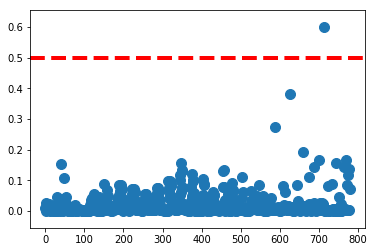

In [51]:
plt.scatter(x=range(0,len(corMat_values)),y=corMat_values, s=100)
plt.axhline(y=0.5, color='r', linestyle='--', linewidth=4)

In [52]:
# ========================================
# SAVE CSV
# ========================================
#df.to_csv('data/df02.csv', sep=",")